In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
import sys
sys.path.append('/Users/perdue/Documents/MINERvA/AI/ANNMINERvA')
print(sys.path)
from evtid_utils import decode_eventid

['', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python27.zip', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/plat-darwin', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/plat-mac', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/lib-tk', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/lib-old', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/lib-dynload', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/cycler-0.10.0-py2.7.egg', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/mccabe-0.6.1-py2.7.egg', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/IPython/extensions', '/Users/perdue/.ipython', '/Users/perdue/Documents/MINERvA/AI/ANNMINERvA']


In [158]:
SAMPLE = 'me1Omc'
PROCESSING = '201804'

In [159]:
DIR_PATH = '/Users/perdue/Documents/MINERvA/AI/hdf5/{}/'.format(PROCESSING)
f = h5py.File(DIR_PATH + 'hadmultkineimgs_127x94_{}.hdf5'.format(SAMPLE), 'r')

for group in f:
    for dset in f[group]:
        print '{:>10}/{:<16} - {:>8} {}'.format(group, dset, np.dtype(f[group][dset]), np.shape(f[group][dset]))

event_data/eventids         -   uint64 (541174, 1)
event_data/eventids_a       -   uint32 (541174, 1)
event_data/eventids_b       -   uint32 (541174, 1)
  gen_data/Q2               -  float32 (541174, 1)
  gen_data/W                -  float32 (541174, 1)
  gen_data/current          -   uint32 (541174, 1)
  gen_data/int_type         -   uint32 (541174, 1)
  gen_data/targetZ          -   uint32 (541174, 1)
  gen_data/x                -  float32 (541174, 1)
  gen_data/y                -  float32 (541174, 1)
hadro_data/esum_chgdkaons   -  float32 (541174, 1)
hadro_data/esum_chgdpions   -  float32 (541174, 1)
hadro_data/esum_hadmultmeas -  float32 (541174, 1)
hadro_data/esum_neutpions   -  float32 (541174, 1)
hadro_data/esum_neutrons    -  float32 (541174, 1)
hadro_data/esum_others      -  float32 (541174, 1)
hadro_data/esum_protons     -  float32 (541174, 1)
hadro_data/n_chgdkaons      -   uint32 (541174, 1)
hadro_data/n_chgdpions      -   uint32 (541174, 1)
hadro_data/n_hadmultmeas    -  

In [160]:
len(f['event_data']['eventids'][:])

541174

In [161]:
print f['event_data'].keys()

[u'eventids', u'eventids_a', u'eventids_b']


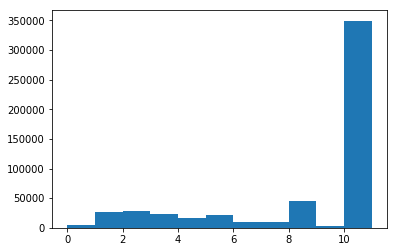

In [162]:
n, bins, patches = plt.hist(f['vtx_data']['segments'][:], bins=11, range=(0, 11))

In [163]:
list(zip(range(0, 11), n))

[(0, 5041.0),
 (1, 27155.0),
 (2, 28991.0),
 (3, 23666.0),
 (4, 17183.0),
 (5, 22193.0),
 (6, 9349.0),
 (7, 9837.0),
 (8, 45954.0),
 (9, 2531.0),
 (10, 349274.0)]

In [164]:
n / n[-1]

array([ 0.01443279,  0.07774698,  0.0830036 ,  0.06775769,  0.04919633,
        0.06354037,  0.02676695,  0.02816413,  0.13157006,  0.00724646,  1.        ])

In [165]:
1.0 / (n / n[-2])

array([ 0.50208292,  0.09320567,  0.08730296,  0.10694667,  0.14729675,
        0.11404497,  0.27072414,  0.25729389,  0.05507682,  1.        ,
        0.00724646])

In [166]:
runnums = [int(decode_eventid(eid[0])[0]) for eid in f['event_data']['eventids'][:500]]
subnums = [int(decode_eventid(eid[0])[1]) for eid in f['event_data']['eventids'][:500]]
gatnums = [int(decode_eventid(eid[0])[2]) for eid in f['event_data']['eventids'][:500]]
phynums = [int(decode_eventid(eid[0])[3]) for eid in f['event_data']['eventids'][:500]]

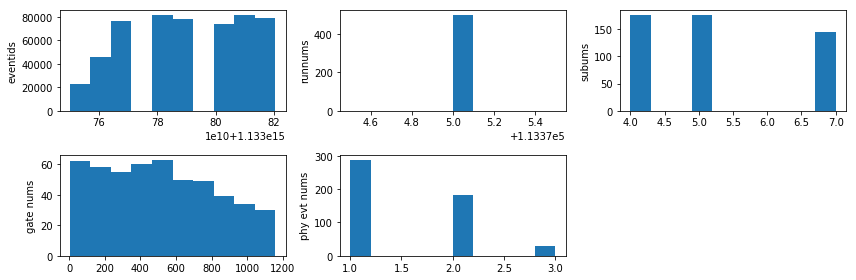

In [167]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(2, 3)

ax = plt.subplot(gs[0])
n, bins, patches = plt.hist(f['event_data']['eventids'][:])
plt.ylabel('eventids')

ax = plt.subplot(gs[1])
n, bins, patches = plt.hist(runnums)
plt.ylabel('runnums')

ax = plt.subplot(gs[2])
n, bins, patches = plt.hist(subnums)
plt.ylabel('subums')

ax = plt.subplot(gs[3])
n, bins, patches = plt.hist(gatnums)
plt.ylabel('gate nums')

ax = plt.subplot(gs[4])
n, bins, patches = plt.hist(phynums)
plt.ylabel('phy evt nums')

plt.tight_layout()

In [168]:
print max(runnums)
print np.max(f['event_data']['eventids'][:])
print np.min(f['event_data']['eventids'][:])

113375
1133820500110602
1133750004000402


In [169]:
np.min(f['vtx_data']['planecodes']), np.max(f['vtx_data']['planecodes'])

(0, 173)

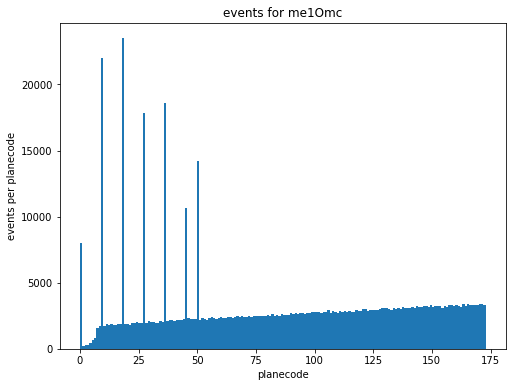

In [170]:
fig = plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(f['vtx_data']['planecodes'][:], bins=174, range=(0, 173))
plt.xlabel('planecode')
plt.ylabel('events per planecode')
plt.title('events for {}'.format(SAMPLE))

fig.savefig('planecode_distribution_{}.png'.format(SAMPLE), bbox_inches='tight')

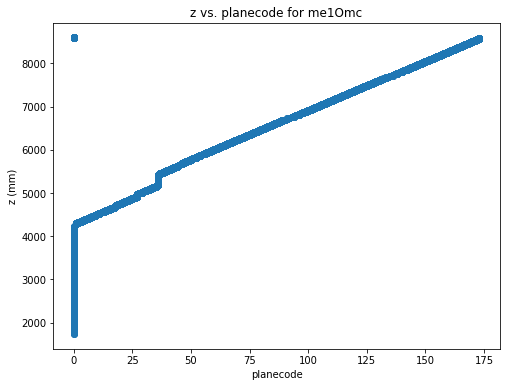

In [171]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(f['vtx_data']['planecodes'][:], f['vtx_data']['zs'][:])
plt.xlabel('planecode')
plt.ylabel('z (mm)')
plt.title('z vs. planecode for {}'.format(SAMPLE))

fig.savefig('z_vs_planecode_{}.png'.format(SAMPLE), bbox_inches='tight')

In [172]:
pcode0idx = f['vtx_data']['planecodes'][:] == 0

In [173]:
np.shape(pcode0idx)

(541174, 1)

In [174]:
pcode0idx

array([[False],
       [False],
       [False],
       ..., 
       [False],
       [False],
       [False]], dtype=bool)

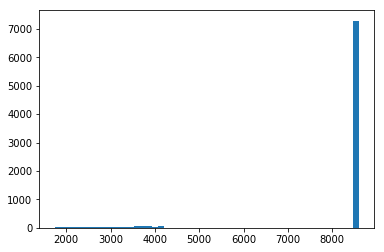

In [175]:
n, bins, patched = plt.hist(f['vtx_data']['zs'][pcode0idx], bins=50)

In [176]:
zgt5000idx = f['vtx_data']['zs'][:] > 5000
zlt6000idx = f['vtx_data']['zs'][:] < 6000
zcut = zgt5000idx
zcut &= zlt6000idx
zcut &= pcode0idx

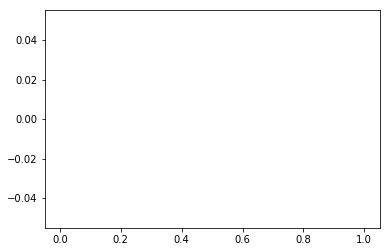

In [177]:
#n, bins, patched = plt.hist(f['vtx_data']['zs'][zcut], bins=60, range=(5150, 5450))
n, bins, patched = plt.hist(f['vtx_data']['zs'][zcut], bins=60)

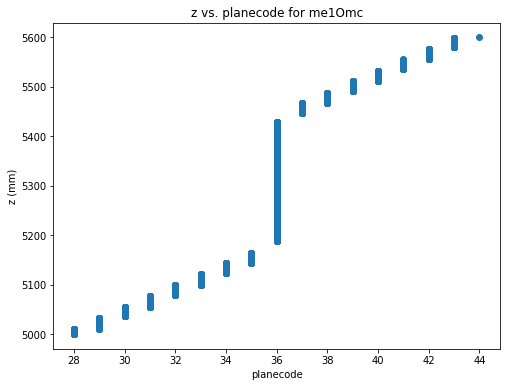

In [178]:
zgt5000idx = f['vtx_data']['zs'][:] > 5000
zlt5600idx = f['vtx_data']['zs'][:] < 5600
zcut = zgt5000idx
zcut &= zlt5600idx

fig = plt.figure(figsize=(8, 6))
plt.scatter(f['vtx_data']['planecodes'][zcut], f['vtx_data']['zs'][zcut])
plt.xlabel('planecode')
plt.ylabel('z (mm)')
plt.title('z vs. planecode for {}'.format(SAMPLE))

fig.savefig('z_vs_planecode_{}.png'.format(SAMPLE), bbox_inches='tight')

In [179]:
f.close()

### some futzing around for "balanced" samples

In [103]:
n[:12]

array([ 116.,    3.,    5.,    8.,    4.,   13.,   11.,   30.,   33.,
        330.,   18.,   30.])

In [104]:
v = 1.0 / (n / n[10])
v[np.where(v > 1.0)] = 1.0
print(v)

[ 0.15517241  1.          1.          1.          1.          1.          1.
  0.6         0.54545455  0.05454545  1.          0.6         0.62068966
  0.64285714  0.58064516  0.7826087   0.62068966  0.47368421  0.04825737
  0.66666667  0.51428571  0.5         0.66666667  0.46153846  0.52941176
  0.62068966  0.62068966  0.0625      0.64285714  0.48648649  0.5625
  0.51428571  0.46153846  0.47368421  0.54545455  0.64285714  0.0625      0.6
  0.54545455  0.5         0.58064516  0.5         0.45        0.40909091
  0.54545455  0.10650888  0.64285714  0.5         0.6         0.85714286
  0.08        0.58064516  0.46153846  0.51428571  0.5         0.51428571
  0.42857143  0.375       0.48648649  0.41860465  0.35294118  0.51428571
  0.6         0.47368421  0.4         0.46153846  0.64285714  0.69230769
  0.35294118  0.40909091  0.35294118  0.52941176  0.54545455  0.58064516
  0.375       0.42857143  0.46153846  0.52941176  0.69230769  0.45
  0.35294118  0.40909091  0.5         0.39130435  0.

In [72]:
target_plane_codes = {9: 1, 18: 2, 27: 3, 44: 4, 49: 5}
targs = target_plane_codes.keys()

In [73]:
kfrac = []
for t in targs:
    kf = (0.5) * (n[t - 1] + n[t + 1]) / n[t]
    kfrac.append(kf)
    
for i, kf in enumerate(kfrac):
    print i+1, kf

1 0.0909090909091
2 0.0921658986175
3 0.106741573034
4 2.56818181818
5 3.47619047619


In [74]:
kfrac = np.array(kfrac)
print kfrac

[ 0.09090909  0.0921659   0.10674157  2.56818182  3.47619048]


In [75]:
kstr = [str(x) for x in kfrac]
print ', '.join(kstr)

0.0909090909091, 0.0921658986175, 0.106741573034, 2.56818181818, 3.47619047619


In [76]:
vstr = []
for i, x in enumerate(v):
    if (i + 1) % 5 == 0:
        vstr.append(str(x) + '\n')
    else:
        vstr.append(str(x))
       
# print(','.join(list(vstr)))

#with open('code.cxx', 'w') as fl:
#    fl.write(','.join(list(vstr)))

### some paper plots

In [22]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [23]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

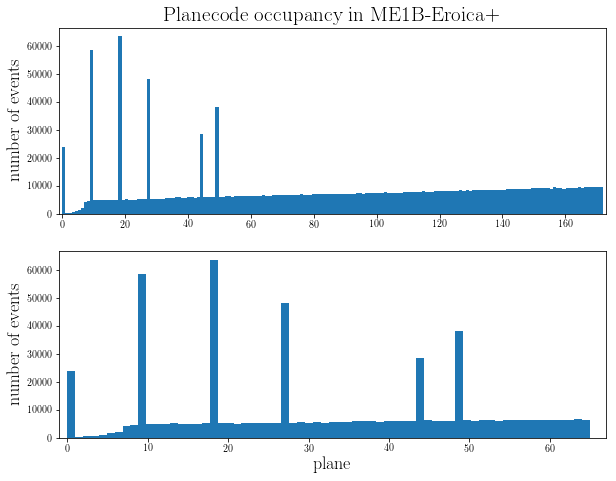

In [24]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(bottom=0.025, left=0.025, top=0.975, right=0.975)

ax1 = plt.subplot(2, 1, 1)
_, _, _ = plt.hist(f['event_data']['planecodes'][:], bins=173, range=(0, 172))
plt.xlim(-1, 173)
plt.title('Planecode occupancy in ME1B-Eroica+', fontsize=21)
plt.ylabel('number of events', fontsize=18)

ax2 = plt.subplot(2, 1, 2)
_, _, _ = plt.hist(f['event_data']['planecodes'][:], bins=66, range=(0, 65))
plt.xlim(-1, 67)
plt.xlabel('plane', fontsize=18)
plt.ylabel('number of events', fontsize=18)

fig.savefig('planecode_occupancy_me1Bmc_eroicaplus.pdf', bbox_inches='tight')

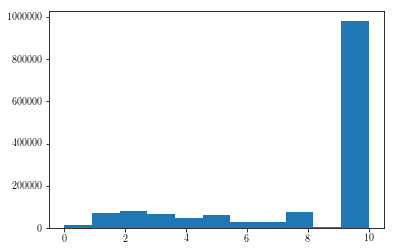

In [25]:
nums, bins, _ = plt.hist(f['event_data']['segments'][:], bins=11, range=(0, 10))

In [26]:
new_nums = np.zeros_like(nums)
new_nums[0] = nums[0]
new_nums[1] = nums[1]
new_nums[2] = nums[6]
new_nums[3] = nums[2]
new_nums[4] = nums[7]
new_nums[5] = nums[3]
new_nums[6] = nums[8]
new_nums[7] = nums[4]
new_nums[8] = nums[9]
new_nums[9] = nums[5]
new_nums[10] = nums[10]

In [27]:
print(nums)
print(new_nums)

[  13391.   72733.   78633.   64183.   46697.   60206.   26231.   26726.
   75937.    6832.  982315.]
[  13391.   72733.   26231.   78633.   26726.   64183.   75937.   46697.
    6832.   60206.  982315.]


In [28]:
new_data = []
[new_data.extend([i] * int(new_nums[i])) for i in range(11)]
#new_data.extend([0] * 5)
#new_data

[None, None, None, None, None, None, None, None, None, None, None]

In [29]:
len(new_data)

1453884

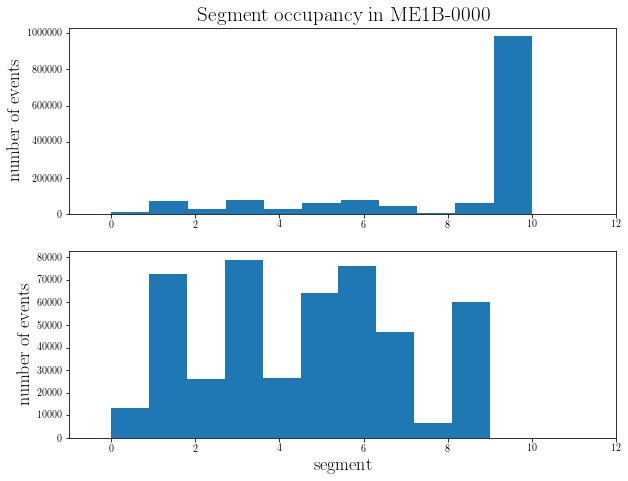

In [30]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(bottom=0.025, left=0.025, top=0.975, right=0.975)

ax1 = plt.subplot(2, 1, 1)
_, _, _ = plt.hist(new_data, bins=11, range=(0, 10))
plt.xlim(-1, 12)
plt.title('Segment occupancy in ME1B-0000', fontsize=21)
plt.ylabel('number of events', fontsize=18)

ax2 = plt.subplot(2, 1, 2)
_, _, _ = plt.hist(new_data, bins=10, range=(0, 9))
plt.xlim(-1, 12)
plt.xlabel('segment', fontsize=18)
plt.ylabel('number of events', fontsize=18)

fig.savefig('segment_occupancy_me1Bmc_0000.pdf', bbox_inches='tight')

In [32]:
import plane_codes

In [33]:
plane_codes.build_reversed_indexed_codes()

{0: (-999, -999, -999),
 1: (-5, 1, 0),
 2: (-5, 2, 0),
 3: (-4, 1, 0),
 4: (-4, 2, 0),
 5: (-3, 1, 0),
 6: (-3, 2, 0),
 7: (-2, 1, 0),
 8: (-2, 2, 0),
 9: (-1, 0, 1),
 10: (0, 1, 0),
 11: (0, 2, 0),
 12: (1, 1, 0),
 13: (1, 2, 0),
 14: (2, 1, 0),
 15: (2, 2, 0),
 16: (3, 1, 0),
 17: (3, 2, 0),
 18: (4, 0, 2),
 19: (5, 1, 0),
 20: (5, 2, 0),
 21: (6, 1, 0),
 22: (6, 2, 0),
 23: (7, 1, 0),
 24: (7, 2, 0),
 25: (8, 1, 0),
 26: (8, 2, 0),
 27: (9, 0, 3),
 28: (11, 1, 0),
 29: (11, 2, 0),
 30: (12, 1, 0),
 31: (12, 2, 0),
 32: (13, 1, 0),
 33: (13, 2, 0),
 34: (14, 1, 0),
 35: (14, 2, 0),
 36: (15, 1, 0),
 37: (15, 2, 0),
 38: (16, 1, 0),
 39: (16, 2, 0),
 40: (17, 1, 0),
 41: (17, 2, 0),
 42: (18, 1, 0),
 43: (18, 2, 0),
 44: (19, 0, 4),
 45: (20, 1, 0),
 46: (20, 2, 0),
 47: (21, 1, 0),
 48: (21, 2, 0),
 49: (22, 0, 5),
 50: (23, 1, 0),
 51: (23, 2, 0),
 52: (24, 1, 0),
 53: (24, 2, 0),
 54: (25, 1, 0),
 55: (25, 2, 0),
 56: (26, 1, 0),
 57: (26, 2, 0),
 58: (27, 1, 0),
 59: (27, 2, 0),


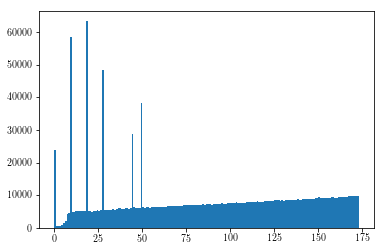

In [34]:
n, bins, patches = plt.hist(f['event_data']['planecodes'][:], bins=np.arange(174))  # need 174 to see all?

In [35]:
planes = np.zeros(np.shape(f['event_data']['planecodes']))
f['event_data']['planecodes'].read_direct(planes)

(array([ 23826.,    485.,    569.,    668.,   1024.,   1657.,   2083.,
          4249.,   4648.,  58536.,   5012.,   5038.,   5049.,   5224.,
          5163.,   5146.,   5102.,   5218.,  63465.,   5231.,   5306.,
          5026.,   5194.,   5182.,   5365.,   5343.,   5463.,  48270.,
          5508.,   5550.,   5488.,   5545.,   5534.,   5655.,   5612.,
          5812.,   5964.,   6003.,   5906.,   5886.,   6010.,   5988.,
          5934.,   6152.,  28728.,   6290.,   6122.,   6212.,   6061.,
         38233.,   6268.,   6239.,   6348.,   6376.,   6218.,   6381.,
          6323.,   6449.,   6480.,   6547.,   6427.,   6522.,   6491.,
          6474.,   6699.,   6582.,   6593.,   6729.,   6766.,   6748.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 

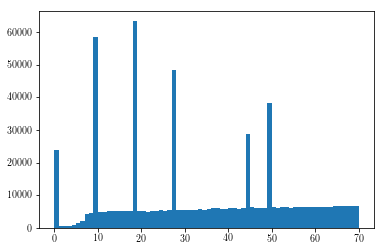

In [36]:
plt.hist(planes[planes < 70], bins=np.arange(71))  # last bins are `[67, 68), [68, 69), [69, 70)`

65
66


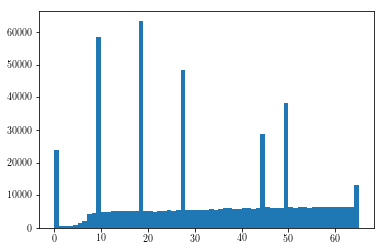

In [37]:
n, bins, _ = plt.hist(planes[planes < 66], bins=np.arange(66))
print len(n)
print len(bins)

In [38]:
print any(planes == 67)

True


In [39]:
print any(planes > 66)

True


In [40]:
print any(planes < 0)

False


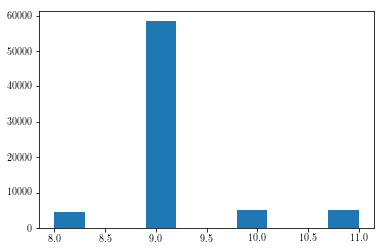

In [41]:
a = np.where(planes >= 8)
b = np.where(planes <= 11)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt1 == 9

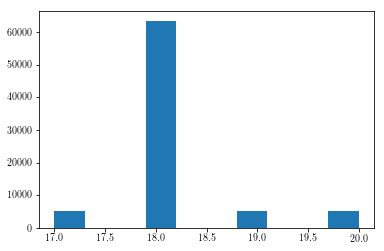

In [42]:
a = np.where(planes >= 17)
b = np.where(planes <= 20)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt2 == 18

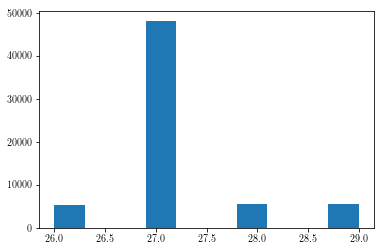

In [43]:
a = np.where(planes >= 26)
b = np.where(planes <= 29)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt3 == 27

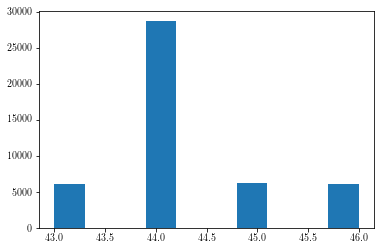

In [44]:
a = np.where(planes >= 43)
b = np.where(planes <= 46)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt4 == 44

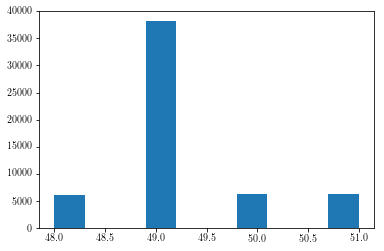

In [45]:
a = np.where(planes >= 48)
b = np.where(planes <= 51)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt5 == 49

In [46]:
segments = np.zeros(np.shape(f['event_data']['segments']))
f['event_data']['segments'].read_direct(segments)

(array([  13391.,   72733.,   78633.,   64183.,   46697.,   60206.,
          26231.,   26726.,   75937.,    6832.,  982315.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

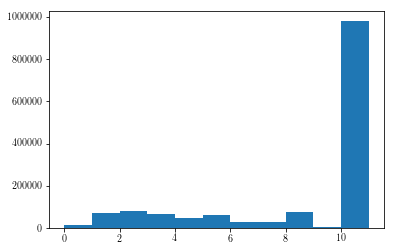

In [47]:
plt.hist(segments, bins=np.arange(12))

In [48]:
print np.min(planes)
print np.max(planes)

0.0
172.0
